<a href="https://colab.research.google.com/github/giteraction/project/blob/master/%EB%B3%B4%ED%96%89%EC%9E%90_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D%EC%9D%84_%ED%86%B5%ED%95%9C_%EB%85%B8%EC%9D%B8_%EB%B3%B4%ED%96%89%EC%9E%90_%EA%B5%90%ED%86%B5%EC%82%AC%EA%B3%A0_%EA%B0%90%EC%86%8C_%EB%B0%A9%EC%95%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
프로젝트에서 정의하는 '노인' 및 '고령자'는 만 65세 이상을 기준으로 합니다.

<사용한 데이터>
OECD, "By age and road user(2020)" 
  - 인구10만명당 노인보행 중 사상자 데이터만 추출하여 사용(결측치 제외) ( rows 21 x columns 2 )
TAAS, "연령층별 보행 사상자(2020)"
  - 서울시/ 시군구별 ( 우주님 데이터 )
  - 서울시/ 사망자수, 부상자수, 중상자수, 경상자수, 부상신고자수로 추출 ( rows 4 x columns 55 )
TAAS, "보행노인 사고다발지역정보(2020)" 
  - 서울시 데이터만 추출하여 사용( rows 106 x columns 15 )
TAAS, "노인 교통사고(2020)"
  - 서울시/ 차대사람/ 가해운전자 법규위반 데이터만 추출( rows 3 x columns 16 )
  - 서울시/ 차대사람 데이터만 추출 ( rows 3 x columns 10 )
공공데이터포털, "전국노인장애인보호구역표준데이터(2020)"
  - 서울시 데이터만 추출하여 사용( rows 145 x columns 17 )

<논문>
김경범,「고령사회 도래에 따른 노인보행자 교통사고 특성 및 감소방안 -제주지역을 중심으로-」「한국콘텐츠학회」,2015
김아람,「GIS활용 노인보행 교통사고 예방과 사고다발구간 개선 방안」「성북구청」,2020
박준범,남궁미,「고령 보행자 교통사고에 영향을 미치는 환경요인에 관한 연구:부산광역시를 중심으로」「한국지리학회지」,2019
이범규,「보행자 교통사고 특성 및 감소방안」「대전세종연구원」,2020
임재경,박정욱,최재식,「고령보행자 교통사고 유발행동 분석 및 교통사고 감소방안」「한국교통연구원」,2018
황경수,김경범,강일,「고령자 이동성 확보를 위한 교통안전대책」「제주발전연구 제18호」,2014

```

## 1. 서론



### 급격한 고령화 속도
- 2022년 현재 우리나라는 65세 이상의 인구가 전체 인구의 14% 이상인 고령사회이며, 2030년 이후에는 초고령사회에 진입할 것으로 예상됩니다.
- 우리나라의 노인 인구가 급속도로 증가하는 상황에서 노인의 안전, 그중에서도 노인 보행자에 대한 안전이 보장되어 있을까요?

### OECD 국가별 10만명 당 노인보행 중 사망자 수
- 우리나라는 불명예스럽게도 OECD 국가 중 인구수 대비 '노인보행중 사망자 수'가 가장 많은 국가입니다.

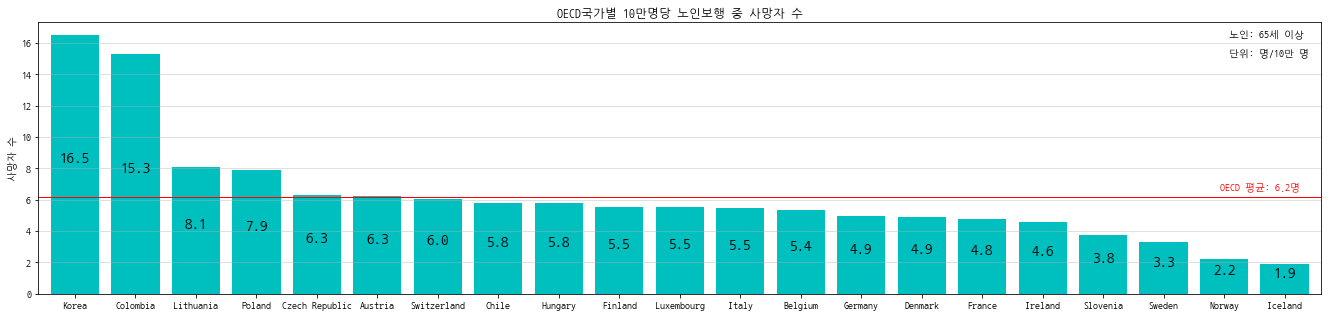

In [ ]:
plt.figure(figsize=(23,5))
n_data = len(Country)
index = np.arange(len(Country))
plt.bar(Country,Per, color = 'c')

plt.ylabel('사망자 수')
plt.grid(True, alpha = 0.5, axis = 'y')
plt.margins(x=0.01)

plt.axhline( y = average, color='r', linewidth = 1) 
plt.title('OECD국가별 10만명당 노인보행 중 사망자 수')

for i in range( len(Country)):
  plt.text( i, Per[i]/2, '%.1f'% Per[i], ha = 'center', va='bottom', size=15)

plt.text(19.6, 6.5,'OECD 평균: 6.2명', color='r', verticalalignment='bottom' , horizontalalignment='center' )
plt.text(19.7, 16.3,'노인: 65세 이상', verticalalignment='bottom' , horizontalalignment='center' )
plt.text(19.74, 15.1,'단위: 명/10만 명', verticalalignment='bottom' , horizontalalignment='center' )

plt.show() 

### 노인에게 더욱 치명적인 보행중 교통사고

#### 서울시 연령층별 보행사상자수, 연령별 사상자 대비 사망자 비율(%)
- 노인 보행자 사고가 얼마나 위험한지를 알아보기 위해 각 연령대별 사망자와 부상자를 각각 더해 새로운 변수(사상자)를 생성했습니다.
- 이를 사망자로 나눠, 사상자가 발생했을 때 어떤 연령대에서 높은 사망율을 보이는 지 분석했습니다.
- 전반적인 사상자 수(막대그래프)는 20대~60대 사이에서 두드러지게 나타나지만, 사상자 대비 사망자 비율(꺾은선 그래프)을 확인하면 61세 이상에서 급격하게 증가하는 모습을 볼 수 있습니다.
- 사상자 수 대비 사망자 비율을 구한 이유는 실제 수치상으로 20대~60대에서 보행자 사고 건수가 많기 때문에, 각 연령대 별로 보행자 사고가 얼마나 치명적인가를 나타내기에는 전체 사상자 대비 사망자 수 대비 사망자 비율이 적합하다고 판단했습니다.


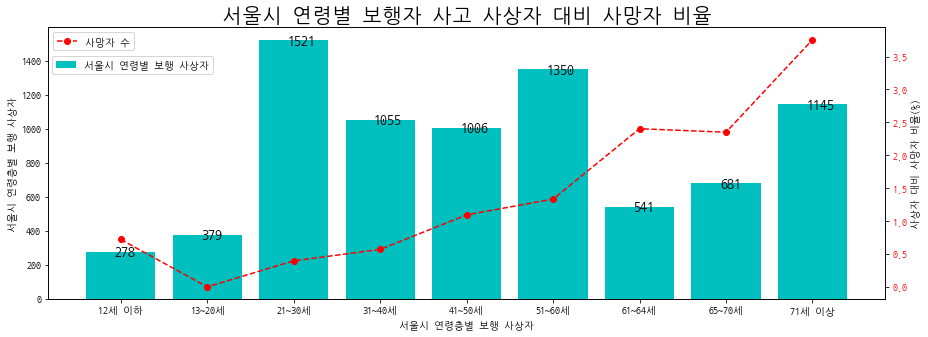

In [ ]:
fig = plt.figure(figsize=(15,5))
fig.set_facecolor('white')
ax1 = fig.add_subplot()

xtick_label_position = list(range(len(a_type))) 
ax1.set_xticks(xtick_label_position) 
ax1.set_xticklabels(a_type) 
a_bar = ax1.bar(xtick_label_position, death, color='c', label = '서울시 연령별 보행 사상자')
plt.xlabel('서울시 연령층별 보행 사상자')
ax1.set_ylabel('서울시 연령층별 보행 사상자')
for i in range( len(a_type)):
  plt.text( i-0.07, death[i]-20, f'{death[i]}', size = 14)
plt.legend(loc=(0.005,0.83))

ax2 = ax1.twinx() 
d_plot = ax2.plot(xtick_label_position, percent, color='r', linestyle='--', marker='o', label = '사망자 수')
ax2.tick_params(axis='y', labelcolor='r')
ax2.set_ylabel('사상자 대비 사망자 비율(%)')


plt.title('서울시 연령별 보행자 사고 사상자 대비 사망자 비율', fontsize=20)
plt.legend(loc='best')
plt.show()

#### 노인보행자 사상자 중 사망자와 부상정도 비율
```
사망: 사고 발생시로부터 30일이내에 사망한 경우
중상: 3주 이상의 치료를 요하는 부상
경상: 5일 이상 3주 미만의 치료를 요하는 부상
부상신고: 5일 미만의 치료를 요하는 부상
사상자: 사망자+부상자
```
- 2020년 서울시 기준, 보행 중 교통사고를 당한 노인의 총 사상자는 1826명 입니다.
- 보행 중 교통사고를 당한 노인들의 부상정도는 3주 이상의 치료를 요하는 중상이 절반 이상입니다.
- 사망자수와 합하면 56% 정도로 교통사고로 인한 노인 보행자의 부상정도가 심각하다고 볼 수 있습니다.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


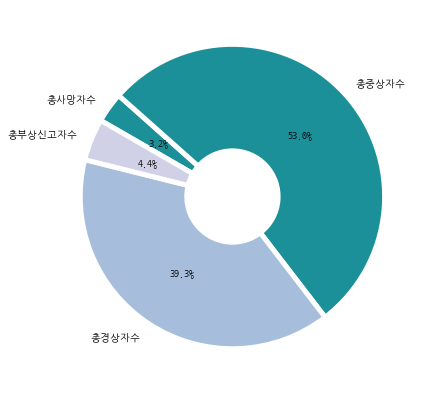

In [ ]:
plt.figure(figsize=(7,7))
wedgeprops = {'width':0.7, 'edgecolor':'w', 'linewidth':5}
plt.pie(rawData, labels = lab, autopct='%.1f%%',startangle=150, counterclock=False, wedgeprops=wedgeprops, colors = ['#1c9099','#1c9099','#a6bddb','#d0d1e6'])
plt.show()

- 고령층에게 발생하는 보행중 교통사고가 비고령층에 비해 더욱 치명적입니다.
- 노인보행자 교통사고 발생을 감소시키기 위한 인사이트가 필요하며, 인사이트 도출을 위한 노인 보행자 교통사고 발생의 원인에 대한 분석이 선행되어야 합니다.

## 2. 노인 보행자 교통사고 발생 원인 분석

### 사고다발지점의 특징
- 노인보행자 교통사고의 발생 원인을 알아보기 위해 사고다발지점을 분석하였습니다.
- 서울시 전체 사고다발지점 데이터 중, 발생건수가 4 이상인 데이터를 추출하였습니다.
- 사고다발지점의 위도,경도 데이터를 이용하여 구글 지도에서 스트리트뷰를 확인하였으며, 사고원인으로 추정되는 변수를 데이터로 만들었습니다.
- 사고다발지점에 변수가 존재하면 1, 그렇지 않으면 0으로 표기하였습니다.
 - (사고다발지점 데이터는 2020년 기준이며, 구글 스트리트뷰는 2018년에 촬영되었으므로 시차를 감안하여주시면 감사하겠습니다.)

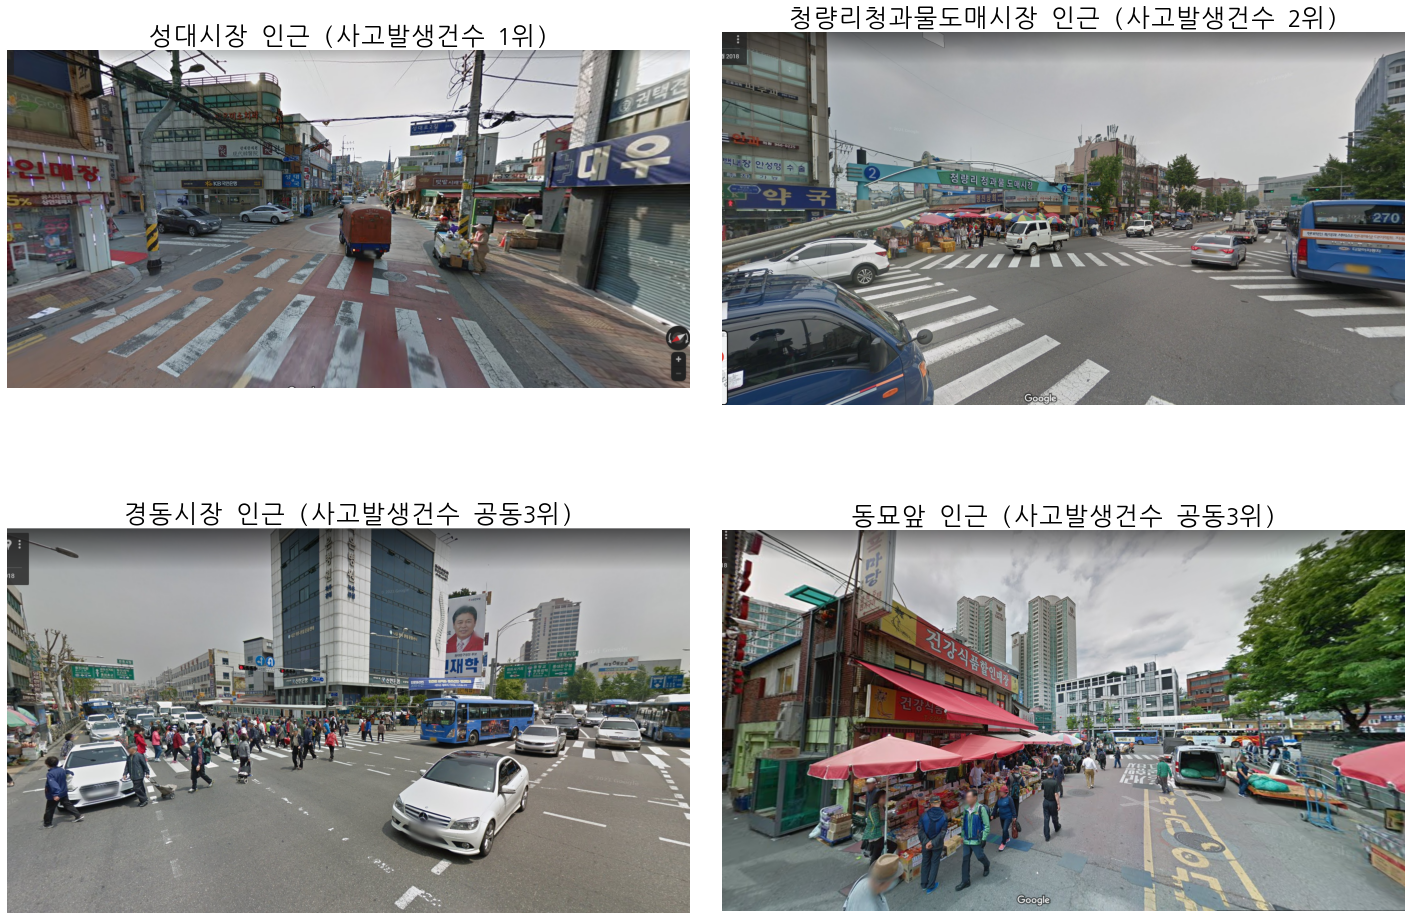

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(20,15))

img1 = mpimg.imread('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_5조/주예린/사고발생건수 상위4곳 로드뷰/1위 동작구 상도동(성대시장 인근).png')
plt.subplot(2, 2, 1) 
plt.imshow(img1)
plt.title("성대시장 인근 (사고발생건수 1위)",fontsize=25)
plt.axis('off')

img2 = mpimg.imread('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_5조/주예린/사고발생건수 상위4곳 로드뷰/2위 동대문구 제기동 (청량리청과물도매시장 인근).png')
plt.subplot(2, 2, 2)  
plt.imshow(img2)
plt.title("청량리청과물도매시장 인근 (사고발생건수 2위)", fontsize=25)
plt.axis('off')

img3 = mpimg.imread('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_5조/주예린/사고발생건수 상위4곳 로드뷰/3위(공동) 동대문구 용두동 (경동시장 인근).png')
plt.subplot(2, 2, 3)  
plt.imshow(img3)
plt.title("경동시장 인근 (사고발생건수 공동3위)", fontsize=25)
plt.axis('off')

img4 = mpimg.imread('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_5조/주예린/사고발생건수 상위4곳 로드뷰/3위(공동) 종로구 숭인동 (동묘 앞).png')
plt.subplot(2, 2, 4)  
plt.imshow(img4)
plt.title("동묘앞 인근 (사고발생건수 공동3위)", fontsize=25)
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
variable = pd.read_csv('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_5조/Data/variable.csv')
variable

,지점명,교차로,시장,무신호횡단로,병원,발생건수,사상자수
0,서울특별시 동작구 상도동(성대약국 부근),1,1,1,0,13,14
1,서울특별시 동대문구 제기동(성바오로병원앞교차로 부근),1,1,0,1,10,10
2,서울특별시 동대문구 용두동(경동시장앞교차로 부근),1,1,0,0,9,12
3,서울특별시 종로구 숭인동(아람보습학원 부근),0,1,0,0,9,10
4,서울특별시 동대문구 회기동(경희대 부근),0,0,0,1,6,11
...,...,...,...,...,...,...,...
59,서울특별시 영등포구 신길동(신길동3994 부근),1,0,1,0,4,4
60,서울특별시 영등포구 당산동1가(영등포청과시장앞교차로 부근),1,1,0,1,4,4
61,서울특별시 동작구 사당동(남성역앞교차로 부근),1,0,1,0,4,4
62,서울특별시 강동구 천호동(천호사거리 부근),1,0,1,1,4,4


In [ ]:
round(pd.DataFrame(variable.describe().loc['mean']).T, 2)

,교차로,시장,무신호횡단로,병원,발생건수,사상자수
mean,0.72,0.3,0.64,0.34,4.98,5.33


- 변수가 존재하면 1, 그렇지 않으면 0으로 표기했기 때문에 평균값이 높으면 사고다발지점에서 변수가 존재하는 확률이 높다고 볼 수 있습니다.
 - 즉, 평균값이 1에 가까울 수록 해당 변수와 보행자교통사고 발생에 상관관계가 높다고 볼 수 있습니다.

In [ ]:
round(pd.DataFrame(variable[variable['발생건수'] > 4.98].describe().loc['mean']).T, 2)

,교차로,시장,무신호횡단로,병원,발생건수,사상자수
mean,0.68,0.41,0.47,0.29,5.85,6.29


In [ ]:
round(pd.DataFrame(variable[variable['발생건수'] < 4.98].describe().loc['mean']).T, 2)

,교차로,시장,무신호횡단로,병원,발생건수,사상자수
mean,0.77,0.17,0.83,0.4,4.0,4.23


- 흥미로운 점은 '발생건수'가 평균 발생건수보다 많은 지점의 경우, 평균 발생건수가 적은 지점에 비해 상대적으로 근처에 시장이 있을 확률이 높다는 사실입니다.
 - 노인 보행자 유동인구가 많을 수록 사건발생이 잦다고 생각해볼 수 있습니다.

- '발생건수'가 평균 발생건수보다 적은 지점의 경우, 사고다발지점에 무신호횡단로가 있을 확률이 높았습니다.


### 노인보행자의 특징

#### 노인보행자 행동유형별 사고발생건수와 사망자수
- 노인보행자 사고 중 횡단 중 사고발생이 2번 째로 많고 사망자는 가장 많습니다.
- 노인은 신체능력 저하로 인해 비고령자에 비해 상대적으로 보행 속도가 느립니다.
 - 이러한 노인의 신체적 특징으로 인하여 사고 발생가능성이 있는 상황에 더 길게 노출됩니다.

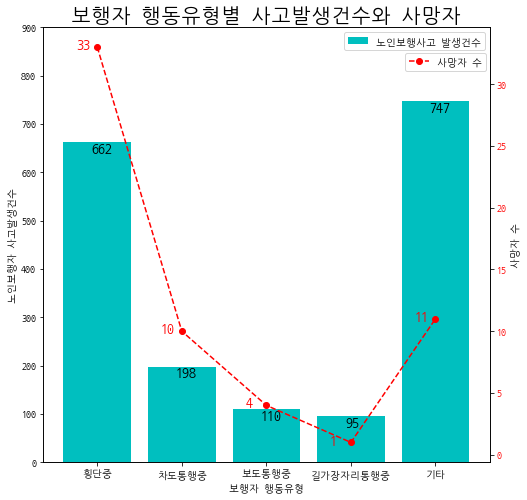

In [ ]:
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax1 = fig.add_subplot()
plt.ylim([0, 900])

xtick_label_position = list(range(len(a_type))) 
ax1.set_xticks(xtick_label_position) 
ax1.set_xticklabels(a_type) 
a_bar = ax1.bar(xtick_label_position, num, color='c', label = '노인보행사고 발생건수')
plt.xlabel('보행자 행동유형')
ax1.set_ylabel('노인보행자 사고발생건수')
for i in range( len(a_type)):
  plt.text( i-0.07, num[i]-20, f'{num[i]}', size = 14)
plt.legend(loc='best')


ax2 = ax1.twinx() 
d_plot = ax2.plot(xtick_label_position, death, color='r', linestyle='--', marker='o', label = '사망자 수')
ax2.tick_params(axis='y', labelcolor='r')
ax2.set_ylabel('사망자 수')
for i in range( len(a_type)):
  plt.text( i-0.25, death[i]-0.1, f'{death[i]}', size = 14, color='r')
plt.legend(loc=(0.81,0.9))

plt.title('보행자 행동유형별 사고발생건수와 사망자', fontsize=20)
plt.show()

### 가해 운전자의 특징

#### 노인 보행사고 중 가해운전자 법규 위반 유형

- 안전운전의무 불이행으로 인한 사고는 전체 사고수 중 87.6%를 차지합니다.
- 또한 그로 인해 사망한 수도 다른 사고에 비해 압도적으로 많습니다.
- 과속의 경우 사고건수는 적은 편이지만 그에 비해 사망률은 치명적입니다.
 - 운전자들의 안전운전의무 인식을 상기시킬 필요가 있겠습니다.


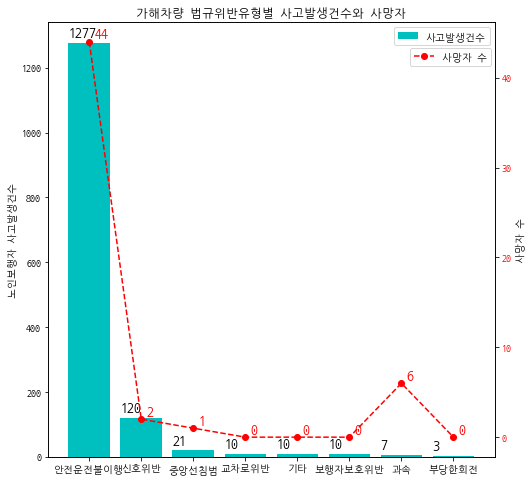

In [ ]:
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax1 = fig.add_subplot()

xtick_label_position = list(range(len(a_type))) 
ax1.set_xticks(xtick_label_position) 
ax1.set_xticklabels(a_type) 
a_bar = ax1.bar(xtick_label_position, num, color='c', label = '사고발생건수')
ax1.set_ylabel('노인보행자 사고발생건수')
for i in range( len(a_type)):
  plt.text( i-0.4, num[i]+20, f'{num[i]}', size = 14)
plt.legend(loc='best')


ax2 = ax1.twinx() 
d_plot = ax2.plot(xtick_label_position, death, color='r', linestyle='--', marker='o', label = '사망자 수')
ax2.tick_params(axis='y', labelcolor='r')
ax2.set_ylabel('사망자 수')
for i in range( len(a_type)):
  plt.text( i+0.1, death[i]+0.5, f'{death[i]}', size = 14, color='r')
plt.legend(loc=(0.81,0.9))



plt.title('가해차량 법규위반유형별 사고발생건수와 사망자')
plt.show()


- 노인보행자 교통사고의 원인을 세 부분에 나누어서 살펴보았습니다.
- 환경, 노인보행자의 특수성, 가해 운전자의 특징들을 고려해봤을 때, 노인 보행중 교통사고감소 해결 방안으로 어린이 보호구역처럼 노인 보호구역을 지정하는 것은 어떨까요?
- 현재 서울시 노인보호구역 현황을 살펴보겠습니다.

## 3. 서울시 노인보호구역 지정 현황
- 서울시 보행노인사고다발지점과 노인보호구역을 지도에 시각화하였습니다.

- 서울시 전체 노인보호구역 145곳 중 17곳이 사고다발지점을 포함하고 있습니다.
 - 사고다발지점은 교통량과 노인유동인구가 많은 곳, 주택가에 위치하고 있습니다.
 - 반면에 노인보호구역은 노인복지관, 요양원 위주로 지정되어 있습니다.
   - 따라서 교통량과 노인유동인구가 많은 지점에 추가로 노인보호구역을 지정해야 합니다.
 - 그러나 노인보호구역으로 지정되었음에도 불구하고 사고다발지점인 곳이 존재합니다.
   - 단순히 노인보호구역 지정에만 그칠 것이 아닌, 추가적인 해결 방안이 필요합니다.

In [ ]:
m = folium.Map(location=[37.58, 127.0], tiles="cartodbpositron", zoom_start=11)

# 지도에 사고다발지점 표시(빨간색 원, 반경 200미터)
for i in oldman.index :
    folium.Circle(
        location = oldman.loc[i, ['위도', '경도']],
        radius = 200,
        color = 'red'
    ).add_to(m)

# 지도에 노인보호구역 표시(파란색 원, 반경 300미터)
for i in silverzone.index :
    folium.Circle(
        location = silverzone.loc[i, ['위도', '경도']],
        radius = 300,
        color = 'dodgerblue'
    ).add_to(m)


m

## 추가적인 해결방안
1. 사고다발지점의 특징과 관련하여 노인 유동인구가 많은 시장 주변의 교통 지도 강화, 무신호 횡단로에 신호등 설치가 필요합니다.
2. 노인보행자는 신체 능력의 저하로 길이가 긴 횡단로의 횡단에 어려움이 있습니다. 횡단로 중간에 횡단쉼터 설치, 녹색 신호 연장 등이 요구됩니다.
3. 가해 운전자의 법규 위반 감소를 위해 운전자 교육 및 단속 강화, cctv 설치가 추가로 시행되어야 합니다.

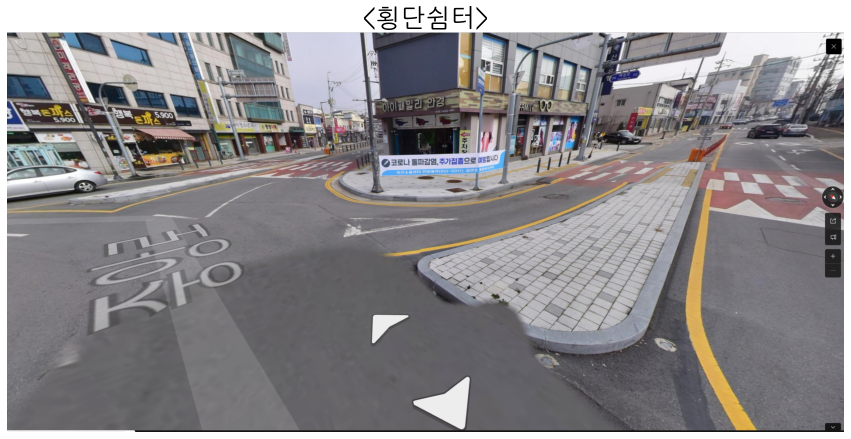

In [ ]:
img = mpimg.imread('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_5조/Data/횡단쉼터.png')
plt.figure(figsize=(15,15))
plt.imshow(img)
plt.title("<횡단쉼터>",fontsize=25)
plt.axis('off')
plt.show()